# 1) import des packaging : 

In [1]:
# Bibliothèques standards
import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Prétraitement des données
from sklearn.preprocessing import StandardScaler

# Modèles et pipelines
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    BayesianRidge,
    ElasticNet
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam

# Évaluation et validation croisée
from sklearn.model_selection import (
    KFold,
    cross_val_score,
    cross_val_predict,
    GridSearchCV,
    RandomizedSearchCV,
    train_test_split
)

# Métriques d'évaluation
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error
)

# Pipelines
from sklearn.pipeline import Pipeline


# 2) import du fichier 

In [2]:
df1 = pd.read_csv('machimachinelearning.csv')

In [3]:
pd.set_option('display.max_columns', None)
df1

Latitude  Longitude  age_de_immeuble  NumberofFloors  \
0    47.61220 -122.33799               98              12   
1    47.61317 -122.33393               29              11   
2    47.61412 -122.33664               99              10   
3    47.61390 -122.33283               99              11   
4    47.60294 -122.33263              121              15   
..        ...        ...              ...             ...   
863  47.61665 -122.33261               10              14   
864  47.62146 -122.33976               11              12   
865  47.62263 -122.33976               10              12   
866  47.62251 -122.33390               11              13   
867  47.53161 -122.29944               96               2   

     PropertyGFABuilding(s)  SecondLargestPropertyUseTypeGFA  \
0                     88434                              0.0   
1                     88502                          15064.0   
2                     61320                              0.0   
3                     83008                              0.0   
4                    163984                              0.0   
..                      ...                              ...   
863                  144614                              0.0   
864                  317442                         136594.0   
865                  317189                         147597.0   
866                  339038                         202178.0   
867                   24990                              0.0   

     ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SourceEUIWN(kBtu/sf)  \
0                          0.000000             60.0            189.000000   
1                       4622.000000             61.0            179.399994   
2                          0.000000             56.0            224.000000   
3                          0.000000             27.0            154.699997   
4                          0.000000             43.0            187.199997   
..                              ...              ...                   ...   
863                        0.000000             89.0            105.599998   
864                        0.000000             99.0            110.000000   
865                        0.000000             98.0            117.599998   
866                     6313.200195             98.0            101.599998   
867                        0.000000              9.0            378.700012   

     SiteEnergyUseWN(kBtu)  TotalGHGEmissions  BuildingType_NonResidential  \
0                7456910.0             249.98                            1   
1                8664479.0             295.86                            1   
2                6946800.5             286.43                            1   
3                6062767.5             176.14                            1   
4               14194054.0             392.16                            1   
..                     ...                ...                          ...   
863              5547964.5              50.32                            1   
864             12926544.0             147.14                            1   
865             14409447.0             202.12                            1   
866             14037166.0             245.16                            0   
867              4731813.5             134.80                            1   

     BuildingType_Nonresidential COS  BuildingType_SPS-District K-12  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   
..                               ...                             ...   
863                                0                               0   
864                                0                 

In [31]:
# Supprimer les colonnes  de df qui ne doivent pas influencer les calcules : 

df = df1.drop(columns=['Latitude', 'Longitude'])

# Vérifier que les colonnes ont été supprimées
print(df.shape) 



(868, 89)


# 3) les models de machine learning : 

# A) regression linéaire : 

In [5]:
# 1. Séparer les caractéristiques (X) et les cibles (y)
X = df.drop(columns=['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'])  
y = df[['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']]

# 2. Standardisation des cibles
y_scaler = StandardScaler()
y_standardized = y_scaler.fit_transform(y)

# 3. Pipeline pour la régression linéaire
linear_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des caractéristiques
    ('linear_reg', LinearRegression())  # Modèle de régression linéaire
])

# 4. Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialiser une liste pour stocker les résultats
results = []

# Fonction pour évaluer le modèle avec validation croisée et calculer les métriques sur l'ensemble des données
def evaluate_model_with_cv_on_all_data(model, X, y, scaler, target_names, model_name):
    for target_idx, target_name in enumerate(target_names):
        # Prédictions sur toutes les données en utilisant cross_val_predict
        y_pred = cross_val_predict(model, X, y[:, target_idx], cv=kf)

        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y[:, target_idx], y_pred)
        mae = mean_absolute_error(y[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y[:, target_idx], y_pred))

        # Stocker les résultats
        results.append({
            'Model': model_name,  # Ajouter le nom du modèle
            'Target': target_name,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse,
        })

# Cibles à analyser
targets = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

# Évaluer le modèle
evaluate_model_with_cv_on_all_data(linear_reg_pipeline, X, y_standardized, y_scaler, targets, model_name='Linear Regression')

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)

# Ajouter les classements
results_df['Rank R²'] = results_df.groupby('Target')['R²'].rank(ascending=False)
results_df['Rank MAE'] = results_df.groupby('Target')['MAE'].rank(ascending=True)
results_df['Rank RMSE'] = results_df.groupby('Target')['RMSE'].rank(ascending=True)

# Afficher les résultats
print("Résultats de l'évaluation du modèle de régression linéaire sur toutes les données :")
results_df

Résultats de l'évaluation du modèle de régression linéaire sur toutes les données :


Model                 Target            R²           MAE  \
0  Linear Regression  SiteEnergyUseWN(kBtu) -5.473485e+23  3.125638e+10   
1  Linear Regression      TotalGHGEmissions -9.638791e+22  1.859666e+10   

           RMSE  Rank R²  Rank MAE  Rank RMSE  
0  7.398300e+11      1.0       1.0        1.0  
1  3.104640e+11      1.0       1.0        1.0

# B) Regression linéaire modifiée : 

Utilisation de train_test_split pour diviser en 80/20.
Ajout de stratify avec pd.qcut pour stratifier les cibles.

In [6]:
# 1. Séparer les caractéristiques (X) et les cibles (y)
X = df.drop(columns=['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'])  
y = df[['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']]

# 2. Standardisation des cibles
y_scaler = StandardScaler()
y_standardized = y_scaler.fit_transform(y)

# 3. Division en jeu d'entraînement et de test (80/20) avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_standardized, test_size=0.2, random_state=42, stratify=pd.qcut(y['SiteEnergyUseWN(kBtu)'], q=4)
)

# 4. Pipeline pour la régression linéaire
linear_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des caractéristiques
    ('linear_reg', LinearRegression())  # Modèle de régression linéaire
])

# 5. Entraîner le modèle sur les données d'entraînement
linear_reg_pipeline.fit(X_train, y_train)

# 6. Faire des prédictions sur le jeu de test
y_pred = linear_reg_pipeline.predict(X_test)

# 7. Calculer les métriques pour chaque cible
results = []
targets = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

for target_idx, target_name in enumerate(targets):
    # Calcul des métriques
    r2 = r2_score(y_test[:, target_idx], y_pred[:, target_idx])
    mae = mean_absolute_error(y_test[:, target_idx], y_pred[:, target_idx])
    rmse = np.sqrt(mean_squared_error(y_test[:, target_idx], y_pred[:, target_idx]))
    
    # Stocker les résultats
    results.append({
        'Model': 'Linear Regression',
        'Target': target_name,
        'R²': r2,
        'MAE': mae,
        'RMSE': rmse,
    })

# 8. Convertir les résultats en DataFrame
results_df_2 = pd.DataFrame(results)

# 9. Ajouter les classements
results_df_2['Rank R²'] = results_df_2.groupby('Target')['R²'].rank(ascending=False)
results_df_2['Rank MAE'] = results_df_2.groupby('Target')['MAE'].rank(ascending=True)
results_df_2['Rank RMSE'] = results_df_2.groupby('Target')['RMSE'].rank(ascending=True)

# 10. Afficher les résultats
print("Résultats de l'évaluation du modèle de régression linéaire sur le jeu de test (80/20) :")
results_df_2


Résultats de l'évaluation du modèle de régression linéaire sur le jeu de test (80/20) :


Model                 Target            R²           MAE  \
0  Linear Regression  SiteEnergyUseWN(kBtu) -1.291383e+21  7.640445e+09   
1  Linear Regression      TotalGHGEmissions -7.225560e+21  1.972928e+10   

           RMSE  Rank R²  Rank MAE  Rank RMSE  
0  5.569543e+10      1.0       1.0        1.0  
1  1.422951e+11      1.0       1.0        1.0

# 4) Les autres models : 

# 1) Bayesian Ridge Regression.

In [7]:
# 1. Séparer les caractéristiques (X) et les cibles (y)
X = df.drop(columns=['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'])  
y = df[['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']]

# 2. Standardisation des cibles
y_scaler = StandardScaler()
y_standardized = y_scaler.fit_transform(y)

# 3. Pipeline pour la Bayesian Ridge Regression
bayesian_ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des caractéristiques
    ('bayesian_ridge', BayesianRidge())  # Modèle Bayesian Ridge Regression
])

# 4. Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialiser une liste pour stocker les résultats
results = []

# Fonction pour évaluer le modèle avec validation croisée et calculer les métriques sur toutes les données
def evaluate_model_with_cv_on_all_data(model, X, y, scaler, target_names, model_name):
    for target_idx, target_name in enumerate(target_names):
        # Prédictions sur toutes les données en utilisant cross_val_predict
        y_pred = cross_val_predict(model, X, y[:, target_idx], cv=kf)

        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y[:, target_idx], y_pred)
        mae = mean_absolute_error(y[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y[:, target_idx], y_pred))

        # Stocker les résultats
        results.append({
            'Model': model_name,  # Ajouter le nom du modèle
            'Target': target_name,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse,
        })

# Cibles à analyser
targets = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

# Évaluer le modèle
evaluate_model_with_cv_on_all_data(bayesian_ridge_pipeline, X, y_standardized, y_scaler, targets, model_name='Bayesian Ridge Regression')

# Convertir les résultats en DataFrame
results_df_bayesian = pd.DataFrame(results)

# Ajouter les classements
results_df_bayesian['Rank R²'] = results_df_bayesian.groupby('Target')['R²'].rank(ascending=False)
results_df_bayesian['Rank MAE'] = results_df_bayesian.groupby('Target')['MAE'].rank(ascending=True)
results_df_bayesian['Rank RMSE'] = results_df_bayesian.groupby('Target')['RMSE'].rank(ascending=True)

# Afficher les résultats
print("Résultats de l'évaluation du modèle Bayesian Ridge Regression sur toutes les données :")
results_df_bayesian


Résultats de l'évaluation du modèle Bayesian Ridge Regression sur toutes les données :


Model                 Target        R²       MAE  \
0  Bayesian Ridge Regression  SiteEnergyUseWN(kBtu)  0.341089  0.227867   
1  Bayesian Ridge Regression      TotalGHGEmissions  0.156562  0.242307   

       RMSE  Rank R²  Rank MAE  Rank RMSE  
0  0.811733      1.0       1.0        1.0  
1  0.918389      1.0       1.0        1.0

# 2. Régression Ridge et Lasso avec Évaluation et Validation Croisée


In [8]:
# Standardisation des cibles
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y)

# Définir les pipelines pour Ridge et Lasso
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features
    ('ridge', Ridge())
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features
    ('lasso', Lasso())
])

# Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grille d'hyperparamètres pour Ridge et Lasso
param_grid_ridge = {'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
param_grid_lasso = {'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Initialiser une liste pour stocker les résultats
results = []

# Fonction pour évaluer un modèle avec validation croisée et calculer les métriques sur toutes les données
def evaluate_model_on_all_data(model, X, y, model_name, param_grid):
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Grid Search pour optimiser alpha
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_root_mean_squared_error')
        grid_search.fit(X, y_standardized[:, target_idx])
        
        # Meilleur alpha
        print(f"Meilleur alpha pour {model_name} ({target}) :", grid_search.best_params_)
        
        # Prédictions sur toutes les données en utilisant le meilleur modèle après GridSearch
        y_pred = cross_val_predict(grid_search.best_estimator_, X, y_standardized[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y_standardized[:, target_idx], y_pred)
        mae = mean_absolute_error(y_standardized[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y_standardized[:, target_idx], y_pred))
        
        # Stocker les résultats
        results.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

# Évaluer Ridge et Lasso
evaluate_model_on_all_data(ridge_pipeline, X, y_standardized, 'Ridge', param_grid_ridge)
evaluate_model_on_all_data(lasso_pipeline, X, y_standardized, 'Lasso', param_grid_lasso)

# Convertir les résultats en DataFrame
results_dfRL = pd.DataFrame(results)

# Ajouter les classements
results_dfRL['Rank R²'] = results_dfRL.groupby('Target')['R²'].rank(ascending=False)  # Plus grand R² est meilleur
results_dfRL['Rank MAE'] = results_dfRL.groupby('Target')['MAE'].rank(ascending=True)  # Plus petit MAE est meilleur
results_dfRL['Rank RMSE'] = results_dfRL.groupby('Target')['RMSE'].rank(ascending=True)  # Plus petit RMSE est meilleur

# Afficher les résultats
print("Comparaison des modèles (Ridge vs Lasso) avec validation croisée et optimisation d'alpha :")
results_dfRL

Meilleur alpha pour Ridge (SiteEnergyUseWN(kBtu)) : {'ridge__alpha': 100.0}
Meilleur alpha pour Ridge (TotalGHGEmissions) : {'ridge__alpha': 100.0}
Meilleur alpha pour Lasso (SiteEnergyUseWN(kBtu)) : {'lasso__alpha': 0.1}
Meilleur alpha pour Lasso (TotalGHGEmissions) : {'lasso__alpha': 0.1}
Comparaison des modèles (Ridge vs Lasso) avec validation croisée et optimisation d'alpha :


Model                 Target        R²       MAE      RMSE  Rank R²  \
0  Ridge  SiteEnergyUseWN(kBtu)  0.399746  0.212317  0.774761      1.0   
1  Ridge      TotalGHGEmissions  0.227093  0.228090  0.879151      2.0   
2  Lasso  SiteEnergyUseWN(kBtu)  0.388265  0.196047  0.782135      2.0   
3  Lasso      TotalGHGEmissions  0.255034  0.200857  0.863114      1.0   

   Rank MAE  Rank RMSE  
0       2.0        1.0  
1       2.0        2.0  
2       1.0        2.0  
3       1.0        1.0

# 2.1)Régression Ridge et Lasso avec Évaluation et Validation Croisée optimizé

In [9]:
# Standardisation des cibles
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y)

# Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Étendre les grilles d'hyperparamètres pour Ridge et Lasso
param_grid_ridge = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Contrôle de la régularisation
    'ridge__tol': [1e-4, 1e-3, 1e-2],               # Tolérance pour convergence
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'lbfgs'],  # Différents solveurs
}

param_grid_lasso = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],  # Contrôle de la régularisation
    'lasso__tol': [1e-4, 1e-3, 1e-2],                      # Tolérance pour convergence
    'lasso__max_iter': [1000, 2000, 5000]                  # Nombre max d'itérations
}

# Pipelines pour Ridge et Lasso
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features
    ('ridge', Ridge())
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features
    ('lasso', Lasso())
])

# Initialiser une liste pour stocker les résultats
results = []

# Fonction pour évaluer un modèle avec validation croisée et calculer les métriques sur toutes les données
def evaluate_model_on_all_data(model, X, y, model_name, param_grid):
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Grid Search pour optimiser les hyperparamètres
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
        grid_search.fit(X, y_standardized[:, target_idx])
        
        # Meilleur ensemble d'hyperparamètres
        print(f"Meilleurs hyperparamètres pour {model_name} ({target}):", grid_search.best_params_)
        
        # Prédictions sur toutes les données en utilisant le meilleur modèle
        best_model = grid_search.best_estimator_
        y_pred = cross_val_predict(best_model, X, y_standardized[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE
        r2 = r2_score(y_standardized[:, target_idx], y_pred)
        mae = mean_absolute_error(y_standardized[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y_standardized[:, target_idx], y_pred))
        
        # Stocker les résultats
        results.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

# Évaluer Ridge et Lasso avec leurs grilles d'hyperparamètres étendues
evaluate_model_on_all_data(ridge_pipeline, X, y_standardized, 'Ridge', param_grid_ridge)
evaluate_model_on_all_data(lasso_pipeline, X, y_standardized, 'Lasso', param_grid_lasso)

# Convertir les résultats en DataFrame
results_dfRL_2 = pd.DataFrame(results)

# Ajouter les classements
results_dfRL_2['Rank R²'] = results_dfRL_2.groupby('Target')['R²'].rank(ascending=False)  # Plus grand R² est meilleur
results_dfRL_2['Rank MAE'] = results_dfRL_2.groupby('Target')['MAE'].rank(ascending=True)  # Plus petit MAE est meilleur
results_dfRL_2['Rank RMSE'] = results_dfRL_2.groupby('Target')['RMSE'].rank(ascending=True)  # Plus petit RMSE est meilleur

# Afficher les résultats
print("Comparaison des modèles Ridge et Lasso avec validation croisée et optimisation des hyperparamètres :")
results_dfRL_2

Fitting 5 folds for each of 105 candidates, totalling 525 fits


C:\Users\mario\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mario\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mario\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 406, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight

Meilleurs hyperparamètres pour Ridge (SiteEnergyUseWN(kBtu)): {'ridge__alpha': 100.0, 'ridge__solver': 'sag', 'ridge__tol': 0.01}
Fitting 5 folds for each of 105 candidates, totalling 525 fits


C:\Users\mario\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mario\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mario\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 406, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight

Meilleurs hyperparamètres pour Ridge (TotalGHGEmissions): {'ridge__alpha': 100.0, 'ridge__solver': 'sag', 'ridge__tol': 0.01}
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Meilleurs hyperparamètres pour Lasso (SiteEnergyUseWN(kBtu)): {'lasso__alpha': 0.1, 'lasso__max_iter': 1000, 'lasso__tol': 0.01}
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Meilleurs hyperparamètres pour Lasso (TotalGHGEmissions): {'lasso__alpha': 0.1, 'lasso__max_iter': 1000, 'lasso__tol': 0.01}
Comparaison des modèles Ridge et Lasso avec validation croisée et optimisation des hyperparamètres :


Model                 Target        R²       MAE      RMSE  Rank R²  \
0  Ridge  SiteEnergyUseWN(kBtu)  0.411197  0.212657  0.767335      1.0   
1  Ridge      TotalGHGEmissions  0.243653  0.227358  0.869682      2.0   
2  Lasso  SiteEnergyUseWN(kBtu)  0.388638  0.196254  0.781896      2.0   
3  Lasso      TotalGHGEmissions  0.255179  0.200954  0.863030      1.0   

   Rank MAE  Rank RMSE  
0       2.0        1.0  
1       2.0        2.0  
2       1.0        2.0  
3       1.0        1.0

# 3) ElasticNet avec validation croisée et optimisation des hyperparamètres :

In [10]:
# Importer les modules nécessaires
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Standardisation des cibles
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y)

# Définir le pipeline pour ElasticNet
elasticnet_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features
    ('elasticnet', ElasticNet())
])

# Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grille d'hyperparamètres pour ElasticNet
param_grid_elasticnet = {
    'elasticnet__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]  # L1_ratio entre 0 (Ridge) et 1 (Lasso)
}

# Initialiser une liste pour stocker les résultats
results = []

# Fonction pour évaluer le modèle ElasticNet avec validation croisée et calculer les métriques sur toutes les données
def evaluate_model_on_all_data(model, X, y, model_name, param_grid):
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Grid Search pour optimiser les hyperparamètres
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_root_mean_squared_error')
        grid_search.fit(X, y_standardized[:, target_idx])
        
        # Meilleurs hyperparamètres
        print(f"Meilleurs hyperparamètres pour {model_name} ({target}) :", grid_search.best_params_)
        
        # Prédictions sur toutes les données en utilisant le meilleur modèle après GridSearch
        y_pred = cross_val_predict(grid_search.best_estimator_, X, y_standardized[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y_standardized[:, target_idx], y_pred)
        mae = mean_absolute_error(y_standardized[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y_standardized[:, target_idx], y_pred))
        
        # Stocker les résultats
        results.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

# Évaluer le modèle ElasticNet
evaluate_model_on_all_data(elasticnet_pipeline, X, y_standardized, 'ElasticNet', param_grid_elasticnet)

# Convertir les résultats en DataFrame
results_dfEN = pd.DataFrame(results)

# Ajouter les classements
results_dfEN['Rank R²'] = results_dfEN.groupby('Target')['R²'].rank(ascending=False)  # Plus grand R² est meilleur
results_dfEN['Rank MAE'] = results_dfEN.groupby('Target')['MAE'].rank(ascending=True)  # Plus petit MAE est meilleur
results_dfEN['Rank RMSE'] = results_dfEN.groupby('Target')['RMSE'].rank(ascending=True)  # Plus petit RMSE est meilleur

# Afficher les résultats
print("Résultats d'ElasticNet avec validation croisée et optimisation des hyperparamètres :")
results_dfEN


Meilleurs hyperparamètres pour ElasticNet (SiteEnergyUseWN(kBtu)) : {'elasticnet__alpha': 1.0, 'elasticnet__l1_ratio': 0.1}
Meilleurs hyperparamètres pour ElasticNet (TotalGHGEmissions) : {'elasticnet__alpha': 1.0, 'elasticnet__l1_ratio': 0.1}
Résultats d'ElasticNet avec validation croisée et optimisation des hyperparamètres :


Model                 Target        R²       MAE      RMSE  Rank R²  \
0  ElasticNet  SiteEnergyUseWN(kBtu)  0.384088  0.202482  0.784801      1.0   
1  ElasticNet      TotalGHGEmissions  0.243947  0.197218  0.869513      1.0   

   Rank MAE  Rank RMSE  
0       1.0        1.0  
1       1.0        1.0

# 4) Arbre de Décision avec Évaluation et validation croisée et optimisation des hyperparamètres :

In [11]:
# Standardisation des cibles
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y)

# Définir le pipeline pour l'arbre de décision
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features (optionnel pour les arbres)
    ('tree', DecisionTreeRegressor(random_state=42))
])

# Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grille d'hyperparamètres pour l'arbre de décision
param_grid_tree = {
    'tree__max_depth': [None, 5, 10, 20],  # Profondeur maximale de l'arbre
    'tree__min_samples_split': [2, 5, 10],  # Nombre minimal d'échantillons pour diviser un nœud
    'tree__min_samples_leaf': [1, 2, 4]  # Nombre minimal d'échantillons dans une feuille
}

# Initialiser une liste pour stocker les résultats
results_tree = []

# Fonction pour évaluer un modèle avec validation croisée et calculer les métriques sur toutes les données
def evaluate_model_on_all_data(model, X, y, model_name, param_grid):
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Grid Search pour optimiser les hyperparamètres
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_root_mean_squared_error')
        grid_search.fit(X, y_standardized[:, target_idx])
        
        # Meilleurs hyperparamètres
        print(f"Meilleurs hyperparamètres pour {model_name} ({target}) :", grid_search.best_params_)
        
        # Prédictions sur toutes les données en utilisant le meilleur modèle après GridSearch
        y_pred = cross_val_predict(grid_search.best_estimator_, X, y_standardized[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y_standardized[:, target_idx], y_pred)
        mae = mean_absolute_error(y_standardized[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y_standardized[:, target_idx], y_pred))
        
        # Stocker les résultats
        results_tree.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

# Évaluer l'arbre de décision
evaluate_model_on_all_data(tree_pipeline, X, y_standardized, 'Decision Tree', param_grid_tree)

# Convertir les résultats en DataFrame
results_tree_df = pd.DataFrame(results_tree)

# Ajouter les classements
results_tree_df['Rank R²'] = results_tree_df.groupby('Target')['R²'].rank(ascending=False)  # Plus grand R² est meilleur
results_tree_df['Rank MAE'] = results_tree_df.groupby('Target')['MAE'].rank(ascending=True)  # Plus petit MAE est meilleur
results_tree_df['Rank RMSE'] = results_tree_df.groupby('Target')['RMSE'].rank(ascending=True)  # Plus petit RMSE est meilleur

# Afficher les résultats
print("Résultats de l'arbre de décision avec validation croisée et optimisation des hyperparamètres :")
results_tree_df

Meilleurs hyperparamètres pour Decision Tree (SiteEnergyUseWN(kBtu)) : {'tree__max_depth': None, 'tree__min_samples_leaf': 2, 'tree__min_samples_split': 2}
Meilleurs hyperparamètres pour Decision Tree (TotalGHGEmissions) : {'tree__max_depth': 20, 'tree__min_samples_leaf': 2, 'tree__min_samples_split': 10}
Résultats de l'arbre de décision avec validation croisée et optimisation des hyperparamètres :


Model                 Target        R²       MAE      RMSE  \
0  Decision Tree  SiteEnergyUseWN(kBtu)  0.485183  0.147630  0.717507   
1  Decision Tree      TotalGHGEmissions  0.214302  0.162873  0.886396   

   Rank R²  Rank MAE  Rank RMSE  
0      1.0       1.0        1.0  
1      1.0       1.0        1.0

# 4.1) Arbre de Décision avec Évaluation et Validation Croisée optimizé 


In [12]:
# Standardisation des cibles
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y)

# Définir le pipeline pour l'arbre de décision
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features (optionnel pour les arbres)
    ('tree', DecisionTreeRegressor(random_state=42))
])

# Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grille étendue d'hyperparamètres pour l'arbre de décision
param_grid_tree = {
    'tree__max_depth': [None, 5, 10, 20, 50],  # Profondeur maximale de l'arbre
    'tree__min_samples_split': [2, 5, 10, 20],  # Nombre minimal d'échantillons pour diviser un nœud
    'tree__min_samples_leaf': [1, 2, 4, 8],  # Nombre minimal d'échantillons dans une feuille
    'tree__max_features': [None, 'sqrt', 'log2'],  # Nombre de features à considérer pour chaque division
    'tree__max_leaf_nodes': [None, 10, 20, 50]  # Nombre maximal de feuilles dans l'arbre
}

# Initialiser une liste pour stocker les résultats
results_tree = []

# Fonction pour évaluer un modèle avec validation croisée et calculer les métriques sur toutes les données
def evaluate_model_on_all_data(model, X, y, model_name, param_grid):
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Grid Search pour optimiser les hyperparamètres
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
        grid_search.fit(X, y_standardized[:, target_idx])
        
        # Meilleurs hyperparamètres
        print(f"Meilleurs hyperparamètres pour {model_name} ({target}):", grid_search.best_params_)
        
        # Prédictions sur toutes les données en utilisant le meilleur modèle après GridSearch
        best_model = grid_search.best_estimator_
        y_pred = cross_val_predict(best_model, X, y_standardized[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE
        r2 = r2_score(y_standardized[:, target_idx], y_pred)
        mae = mean_absolute_error(y_standardized[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y_standardized[:, target_idx], y_pred))
        
        # Stocker les résultats
        results_tree.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

# Évaluer l'arbre de décision avec des hyperparamètres étendus
evaluate_model_on_all_data(tree_pipeline, X, y_standardized, 'Decision Tree_2', param_grid_tree)

# Convertir les résultats en DataFrame
results_tree_df_2 = pd.DataFrame(results_tree)

# Ajouter les classements
results_tree_df_2['Rank R²'] = results_tree_df_2.groupby('Target')['R²'].rank(ascending=False)  # Plus grand R² est meilleur
results_tree_df_2['Rank MAE'] = results_tree_df_2.groupby('Target')['MAE'].rank(ascending=True)  # Plus petit MAE est meilleur
results_tree_df_2['Rank RMSE'] = results_tree_df_2.groupby('Target')['RMSE'].rank(ascending=True)  # Plus petit RMSE est meilleur

# Afficher les résultats
print("Résultats de l'arbre de décision avec validation croisée et optimisation des hyperparamètres étendus :")
results_tree_df_2


Fitting 5 folds for each of 960 candidates, totalling 4800 fits
Meilleurs hyperparamètres pour Decision Tree_2 (SiteEnergyUseWN(kBtu)): {'tree__max_depth': None, 'tree__max_features': None, 'tree__max_leaf_nodes': None, 'tree__min_samples_leaf': 8, 'tree__min_samples_split': 2}
Fitting 5 folds for each of 960 candidates, totalling 4800 fits
Meilleurs hyperparamètres pour Decision Tree_2 (TotalGHGEmissions): {'tree__max_depth': 20, 'tree__max_features': 'sqrt', 'tree__max_leaf_nodes': None, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}
Résultats de l'arbre de décision avec validation croisée et optimisation des hyperparamètres étendus :


Model                 Target        R²       MAE      RMSE  \
0  Decision Tree_2  SiteEnergyUseWN(kBtu)  0.501554  0.145431  0.706007   
1  Decision Tree_2      TotalGHGEmissions  0.693497  0.150086  0.553627   

   Rank R²  Rank MAE  Rank RMSE  
0      1.0       1.0        1.0  
1      1.0       1.0        1.0

# 5) XGBoost 

In [13]:
# Standardisation des cibles
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y)

# Définir le pipeline pour XGBoost
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features (optionnel pour XGBoost)
    ('xgb', XGBRegressor(random_state=42))
])

# Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grille d'hyperparamètres pour XGBoost
param_grid_xgb = {
    'xgb__n_estimators': [100, 200, 300],  # Nombre d'arbres
    'xgb__max_depth': [3, 5, 7],  # Profondeur maximale de chaque arbre
    'xgb__learning_rate': [0.01, 0.1, 0.2],  # Taux d'apprentissage
    'xgb__subsample': [0.8, 1.0],  # Fraction des échantillons utilisés pour chaque arbre
    'xgb__colsample_bytree': [0.8, 1.0]  # Fraction des caractéristiques utilisées pour chaque arbre
}

# Initialiser une liste pour stocker les résultats
results_xgb = []

# Fonction pour évaluer un modèle avec validation croisée et calculer les métriques sur toutes les données
def evaluate_model_on_all_data(model, X, y, model_name, param_grid):
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Grid Search pour optimiser les hyperparamètres
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_root_mean_squared_error')
        grid_search.fit(X, y_standardized[:, target_idx])
        
        # Meilleurs hyperparamètres
        print(f"Meilleurs hyperparamètres pour {model_name} ({target}) :", grid_search.best_params_)
        
        # Prédictions sur toutes les données en utilisant le meilleur modèle après GridSearch
        y_pred = cross_val_predict(grid_search.best_estimator_, X, y_standardized[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y_standardized[:, target_idx], y_pred)
        mae = mean_absolute_error(y_standardized[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y_standardized[:, target_idx], y_pred))
        
        # Stocker les résultats
        results_xgb.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

# Évaluer XGBoost
evaluate_model_on_all_data(xgb_pipeline, X, y_standardized, 'XGBoost', param_grid_xgb)

# Convertir les résultats en DataFrame
results_xgb_df = pd.DataFrame(results_xgb)

# Ajouter les classements
results_xgb_df['Rank R²'] = results_xgb_df.groupby('Target')['R²'].rank(ascending=False)  # Plus grand R² est meilleur
results_xgb_df['Rank MAE'] = results_xgb_df.groupby('Target')['MAE'].rank(ascending=True)  # Plus petit MAE est meilleur
results_xgb_df['Rank RMSE'] = results_xgb_df.groupby('Target')['RMSE'].rank(ascending=True)  # Plus petit RMSE est meilleur

# Afficher les résultats
print("Résultats de XGBoost avec validation croisée et optimisation des hyperparamètres :")
results_xgb_df

Meilleurs hyperparamètres pour XGBoost (SiteEnergyUseWN(kBtu)) : {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 300, 'xgb__subsample': 0.8}
Meilleurs hyperparamètres pour XGBoost (TotalGHGEmissions) : {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 300, 'xgb__subsample': 0.8}
Résultats de XGBoost avec validation croisée et optimisation des hyperparamètres :


Model                 Target        R²       MAE      RMSE  Rank R²  \
0  XGBoost  SiteEnergyUseWN(kBtu)  0.567548  0.113004  0.657611      1.0   
1  XGBoost      TotalGHGEmissions  0.388196  0.138441  0.782179      1.0   

   Rank MAE  Rank RMSE  
0       1.0        1.0  
1       1.0        1.0

# 5.1) Modification des hyperparamettres pour XGBOOST 

In [14]:
# Grille d'hyperparamètres étendue pour XGBoost
param_grid_xgb_extended = {
    'xgb__n_estimators': [50, 100, 200, 300, 500],
    'xgb__max_depth': [3, 5, 7, 10],
    'xgb__learning_rate': [0.001, 0.01, 0.1, 0.2],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__gamma': [0, 0.1, 0.3],
    'xgb__reg_alpha': [0, 0.1, 1],
    'xgb__reg_lambda': [0.1, 1, 10]
}

# Fonction pour évaluer un modèle avec RandomizedSearchCV
def evaluate_model_random_search(model, X, y, model_name, param_grid, n_iter=50):
    results_xgb = []  # N'oubliez pas de définir la liste avant l'évaluation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Assurez-vous que le KFold est bien défini
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Randomized Search pour optimiser les hyperparamètres
        random_search = RandomizedSearchCV(
            model, param_distributions=param_grid, 
            n_iter=n_iter, cv=kf, scoring='neg_root_mean_squared_error', random_state=42
        )
        random_search.fit(X, y[:, target_idx])
        
        # Meilleurs hyperparamètres
        print(f"Meilleurs hyperparamètres pour {model_name} ({target}) :", random_search.best_params_)
        
        # Prédictions sur toutes les données
        y_pred = cross_val_predict(random_search.best_estimator_, X, y[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y[:, target_idx], y_pred)
        mae = mean_absolute_error(y[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y[:, target_idx], y_pred))
        
        # Stocker les résultats
        results_xgb.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

    # Convertir les résultats en DataFrame
    results_xgb_df = pd.DataFrame(results_xgb)
    # Ajouter les classements
    results_xgb_df['Rank R²'] = results_xgb_df.groupby('Target')['R²'].rank(ascending=False)
    results_xgb_df['Rank MAE'] = results_xgb_df.groupby('Target')['MAE'].rank(ascending=True)
    results_xgb_df['Rank RMSE'] = results_xgb_df.groupby('Target')['RMSE'].rank(ascending=True)

    # Afficher les résultats
    print("Résultats étendus de XGBoost avec RandomizedSearchCV :")
    return results_xgb_df

# Appel de la fonction
results_xgb_df_2 = evaluate_model_random_search(xgb_pipeline, X, y_standardized, 'XGBoost', param_grid_xgb_extended, n_iter=50)

# Affichage des résultats
results_xgb_df_2


Meilleurs hyperparamètres pour XGBoost (SiteEnergyUseWN(kBtu)) : {'xgb__subsample': 1.0, 'xgb__reg_lambda': 10, 'xgb__reg_alpha': 1, 'xgb__n_estimators': 500, 'xgb__min_child_weight': 5, 'xgb__max_depth': 10, 'xgb__learning_rate': 0.2, 'xgb__gamma': 0.3, 'xgb__colsample_bytree': 1.0}
Meilleurs hyperparamètres pour XGBoost (TotalGHGEmissions) : {'xgb__subsample': 0.8, 'xgb__reg_lambda': 0.1, 'xgb__reg_alpha': 1, 'xgb__n_estimators': 100, 'xgb__min_child_weight': 1, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.2, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.6}
Résultats étendus de XGBoost avec RandomizedSearchCV :


Model                 Target        R²       MAE      RMSE  Rank R²  \
0  XGBoost  SiteEnergyUseWN(kBtu)  0.690114  0.121318  0.556674      1.0   
1  XGBoost      TotalGHGEmissions  0.509763  0.132367  0.700169      1.0   

   Rank MAE  Rank RMSE  
0       1.0        1.0  
1       1.0        1.0

# 6) model de reseau de neuronnes

In [15]:
# Standardisation des cibles
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y)

# Standardisation des features (important pour les réseaux de neurones)
scaler_X = StandardScaler()
X_standardized = scaler_X.fit_transform(X)

# Fonction pour créer le modèle de réseaux de neurones
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))  # Couche cachée 1
    model.add(Dense(32, activation='relu'))  # Couche cachée 2
    model.add(Dense(16, activation='relu'))  # Couche cachée 3
    model.add(Dense(1, activation='linear'))  # Couche de sortie (régression)
    
    # Compiler le modèle
    optimizer = Adam(learning_rate=0.001)  # Optimiseur Adam avec un taux d'apprentissage
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    return model

# Envelopper le modèle Keras dans un wrapper compatible avec scikit-learn
nn_model = KerasRegressor(build_fn=lambda: create_nn_model(X_standardized.shape[1]), epochs=50, batch_size=32, verbose=0)

# Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialiser une liste pour stocker les résultats
results_nn = []

# Fonction pour évaluer un modèle avec validation croisée et calculer les métriques sur toutes les données
def evaluate_model_on_all_data(model, X, y, model_name):
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Validation croisée
        y_pred = cross_val_predict(model, X, y[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y[:, target_idx], y_pred)
        mae = mean_absolute_error(y[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y[:, target_idx], y_pred))
        
        # Stocker les résultats
        results_nn.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

# Évaluer le modèle de réseaux de neurones
evaluate_model_on_all_data(nn_model, X_standardized, y_standardized, 'Neural Network')

# Convertir les résultats en DataFrame
results_nn_df = pd.DataFrame(results_nn)

# Ajouter les classements
results_nn_df['Rank R²'] = results_nn_df.groupby('Target')['R²'].rank(ascending=False)  # Plus grand R² est meilleur
results_nn_df['Rank MAE'] = results_nn_df.groupby('Target')['MAE'].rank(ascending=True)  # Plus petit MAE est meilleur
results_nn_df['Rank RMSE'] = results_nn_df.groupby('Target')['RMSE'].rank(ascending=True)  # Plus petit RMSE est meilleur

# Afficher les résultats
print("Résultats du réseau de neurones avec validation croisée :")
results_nn_df

C:\Users\mario\AppData\Local\Temp\ipykernel_13424\3565125766.py:23: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_model = KerasRegressor(build_fn=lambda: create_nn_model(X_standardized.shape[1]), epochs=50, batch_size=32, verbose=0)


Résultats du réseau de neurones avec validation croisée :


Model                 Target        R²       MAE      RMSE  \
0  Neural Network  SiteEnergyUseWN(kBtu)  0.368845  0.225201  0.794453   
1  Neural Network      TotalGHGEmissions  0.344568  0.206234  0.809588   

   Rank R²  Rank MAE  Rank RMSE  
0      1.0       1.0        1.0  
1      1.0       1.0        1.0

# 7) Support Vector Machines (SVM)

In [16]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Standardisation des cibles
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y)

# Pipeline pour le modèle SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features
    ('svr', SVR())
])

# Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grille d'hyperparamètres pour SVM
param_grid_svm = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 0.2, 0.5],
    'svr__kernel': ['linear', 'rbf']
}

# Initialiser une liste pour stocker les résultats
results = []

def evaluate_model_on_all_data(model, X, y, model_name, param_grid):
    best_models = {}
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Grid Search pour optimiser les hyperparamètres
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_root_mean_squared_error')
        grid_search.fit(X, y[:, target_idx])
        
        # Meilleurs hyperparamètres
        print(f"Meilleurs hyperparamètres pour {model_name} ({target}) :", grid_search.best_params_)
        
        # Validation croisée avec les meilleurs hyperparamètres (prédictions sur toutes les données)
        y_pred = cross_val_predict(grid_search.best_estimator_, X, y[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y[:, target_idx], y_pred)
        mae = mean_absolute_error(y[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y[:, target_idx], y_pred))
        
        # Stocker les résultats
        results.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

        # Stocker le meilleur modèle pour chaque cible
        best_models[target] = grid_search.best_estimator_
    
    return best_models


# Évaluer le modèle SVM
evaluate_model_on_all_data(svm_pipeline, X, y_standardized, 'SVM', param_grid_svm)

# Convertir les résultats en DataFrame
results_dfSVM = pd.DataFrame(results)

# Ajouter les classements
results_dfSVM['Rank R²'] = results_dfSVM.groupby('Target')['R²'].rank(ascending=False)  # Plus grand R² est meilleur
results_dfSVM['Rank MAE'] = results_dfSVM.groupby('Target')['MAE'].rank(ascending=True)  # Plus petit MAE est meilleur
results_dfSVM['Rank RMSE'] = results_dfSVM.groupby('Target')['RMSE'].rank(ascending=True)  # Plus petit RMSE est meilleur

# Afficher les résultats
print("Comparaison du modèle SVM avec validation croisée et optimisation d'hyperparamètres :")
results_dfSVM


Meilleurs hyperparamètres pour SVM (SiteEnergyUseWN(kBtu)) : {'svr__C': 10, 'svr__epsilon': 0.01, 'svr__kernel': 'rbf'}
Meilleurs hyperparamètres pour SVM (TotalGHGEmissions) : {'svr__C': 100, 'svr__epsilon': 0.1, 'svr__kernel': 'rbf'}
Comparaison du modèle SVM avec validation croisée et optimisation d'hyperparamètres :


Model                 Target        R²       MAE      RMSE  Rank R²  \
0   SVM  SiteEnergyUseWN(kBtu)  0.481590  0.150439  0.720007      1.0   
1   SVM      TotalGHGEmissions  0.504153  0.155035  0.704164      1.0   

   Rank MAE  Rank RMSE  
0       1.0        1.0  
1       1.0        1.0

# 5) résultats : 

# Fusion des DataFrames, Calcul du score global, Classement des modèles

In [17]:
# Supposons que vos DataFrames sont déjà chargés
# Exemple : results_df, results_df_basian, results_dfRL, results_tree_df, results_xgb_df, results_lgbm_df, results_nn_df, results_dfSVM

# Fusionner tous les DataFrames en un seul
merged_df = pd.concat([
    results_df,
    results_df_2,
    results_df_bayesian,
    results_dfRL,
    results_dfRL_2,
    results_dfEN,
    results_tree_df,
    results_tree_df_2,
    results_xgb_df,
    results_xgb_df_2,
    results_nn_df,
    results_dfSVM, 
], ignore_index=True)

# Normalisation et calcul du score global
# Score = R² + (1 - MAE / max(MAE)) + (1 - RMSE / max(RMSE))
merged_df['Score'] = (
    merged_df['R²'] +  # R² : plus élevé est meilleur
    (1 - merged_df['MAE'] / merged_df['MAE'].max()) +  # MAE : plus faible est meilleur
    (1 - merged_df['RMSE'] / merged_df['RMSE'].max())  # RMSE : plus faible est meilleur
)

# Classer les modèles par score global (du meilleur au moins bon)
merged_df_sorted = merged_df.sort_values(by='Score', ascending=False)

# Réinitialiser l'index pour avoir un DataFrame propre
merged_df_sorted = merged_df_sorted.reset_index(drop=True)

# Arrondir les valeurs à 2 chiffres après la virgule
merged_df_sorted = merged_df_sorted.round(2)

# Formater l'affichage pour utiliser la notation décimale standard
pd.set_option('display.float_format', '{:.2f}'.format)

# Afficher le résultat
print("Modèles classés du meilleur au moins bon :")
merged_df_sorted



Modèles classés du meilleur au moins bon :


Model                 Target  \
0             Decision Tree_2      TotalGHGEmissions   
1                     XGBoost  SiteEnergyUseWN(kBtu)   
2                     XGBoost  SiteEnergyUseWN(kBtu)   
3                     XGBoost      TotalGHGEmissions   
4                         SVM      TotalGHGEmissions   
5             Decision Tree_2  SiteEnergyUseWN(kBtu)   
6               Decision Tree  SiteEnergyUseWN(kBtu)   
7                         SVM  SiteEnergyUseWN(kBtu)   
8                       Ridge  SiteEnergyUseWN(kBtu)   
9                       Ridge  SiteEnergyUseWN(kBtu)   
10                      Lasso  SiteEnergyUseWN(kBtu)   
11                      Lasso  SiteEnergyUseWN(kBtu)   
12                    XGBoost      TotalGHGEmissions   
13                 ElasticNet  SiteEnergyUseWN(kBtu)   
14             Neural Network  SiteEnergyUseWN(kBtu)   
15             Neural Network      TotalGHGEmissions   
16  Bayesian Ridge Regression  SiteEnergyUseWN(kBtu)   
17                      Lasso      TotalGHGEmissions   
18                      Lasso      TotalGHGEmissions   
19                 ElasticNet      TotalGHGEmissions   
20                      Ridge      TotalGHGEmissions   
21                      Ridge      TotalGHGEmissions   
22              Decision Tree      TotalGHGEmissions   
23  Bayesian Ridge Regression      TotalGHGEmissions   
24          Linear Regression  SiteEnergyUseWN(kBtu)   
25          Linear Regression      TotalGHGEmissions   
26          Linear Regression      TotalGHGEmissions   
27          Linear Regression  SiteEnergyUseWN(kBtu)   

                             R²            MAE            RMSE  Rank R²  \
0                          0.69           0.15            0.55     1.00   
1                          0.69           0.12            0.56     1.00   
2                          0.57           0.11            0.66     1.00   
3                          0.51           0.13            0.70     1.00   
4                          0.50           0.16            0.70     1.00   
5                          0.50           0.15            0.71     1.00   
6                          0.49           0.15            0.72     1.00   
7                          0.48           0.15            0.72     1.00   
8                          0.41           0.21            0.77     1.00   
9                          0.40           0.21            0.77     1.00   
10                         0.39           0.20            0.78     2.00   
11                         0.39           0.20            0.78     2.00   
12                         0.39           0.14            0.78     1.00   
13                         0.38           0.20            0.78     1.00   
14                         0.37           0.23            0.79     1.00   
15                         0.34           0.21            0.81     1.00   
16                         0.34           0.23            0.81     1.00   
17                         0.26           0.20            0.86     1.00   
18                         0.26           0.20            0.86     1.00   
19                         0.24           0.20            0.87     1.00   
20                         0.24           0.23            0.87     2.00   
21                         0.23           0.23            0.88     2.00   
22                         0.21           0.16            0.89     1.00   
23                         0.16           0.24            0.92     1.00   
24   -1291383207786938368000.00  7640445084.97  55695432304.37     1.00   
25   -7225559781515161763840.00 19729284067.00 142295077021.79     1.00   
26  -96387908914129561190400.00 18596659939.37 310464021931.90     1.00   
27 -547348457682025872097280.00 31256384963.70 739830019451.78     1.00   

    Rank MAE  Rank RMSE                        Score  
0       1.00       1.00                         2.69  
1       1.00       1.00                         2.69  
2       1.00       1.00                         2.57  
3  

# 6) conclusion : 

# 7) importances des variables :

# 7.1) Analyse de l'importance des caractéristiques pour la cible "SiteEnergyUseWN(kBtu)" avec LE MODEL XGBOOST :

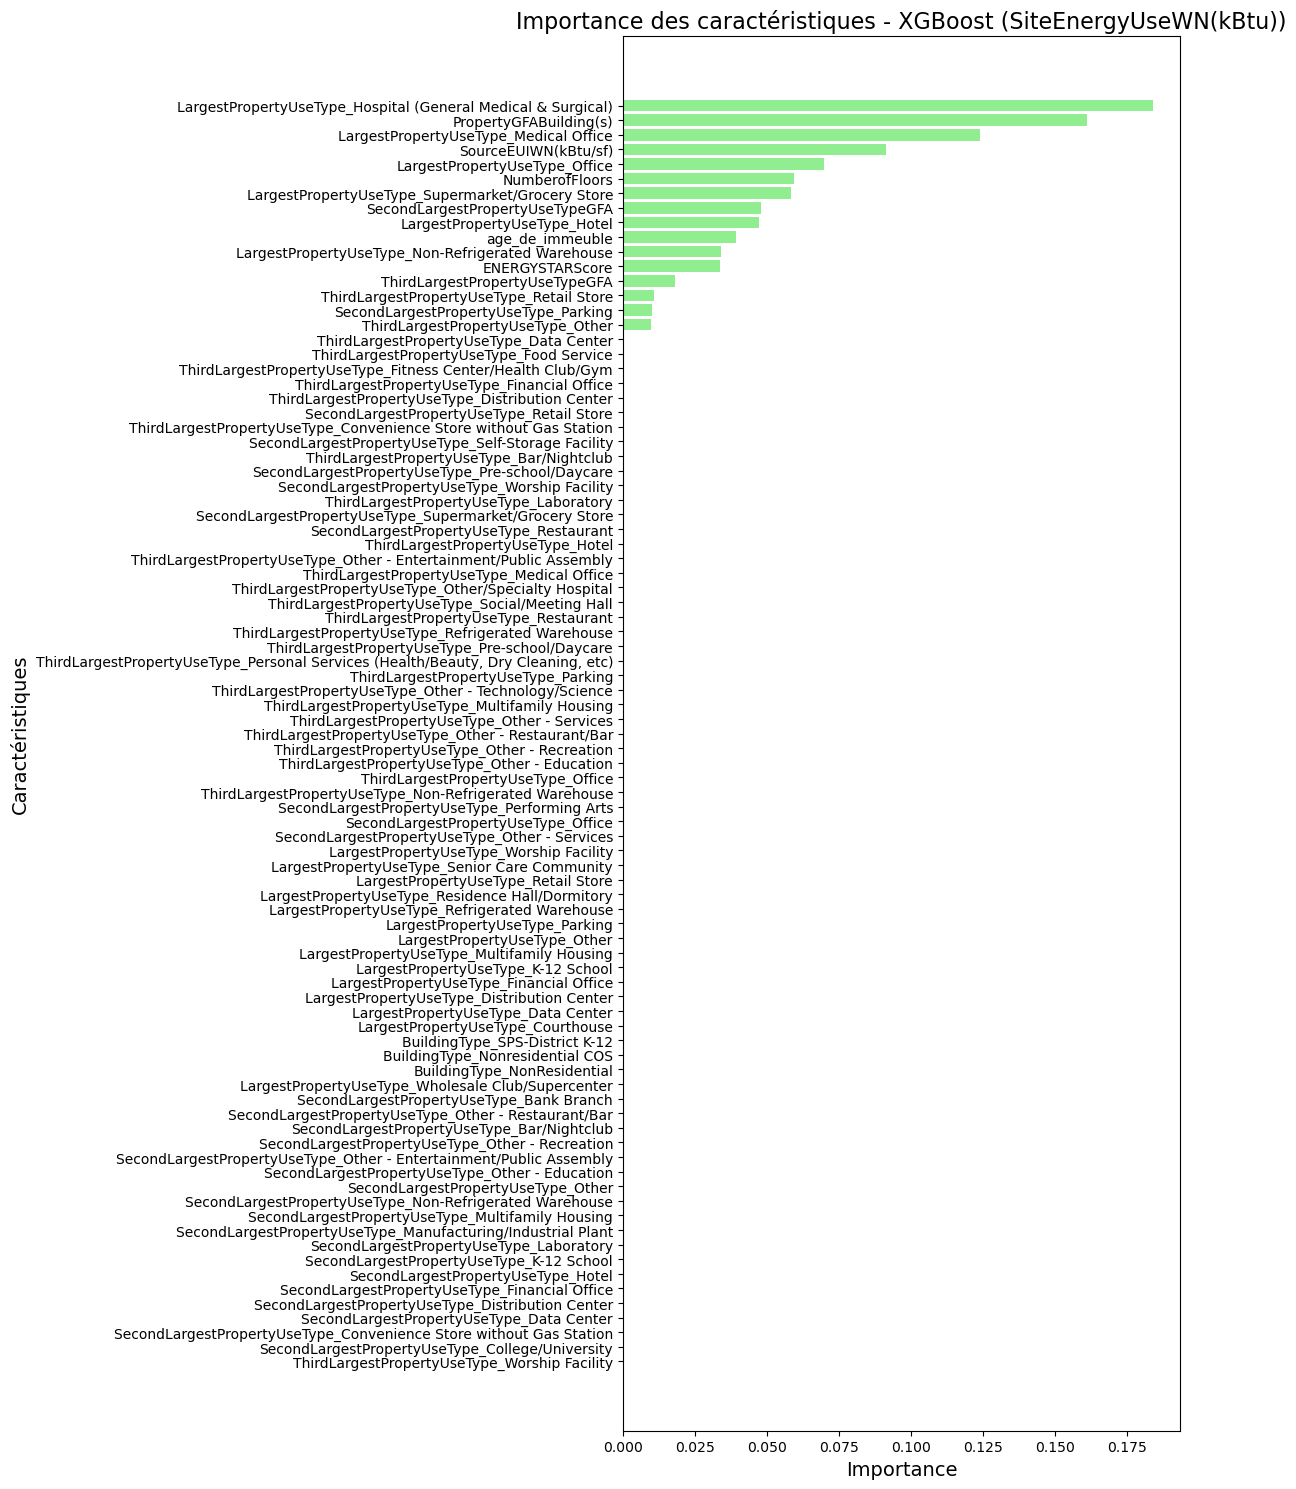

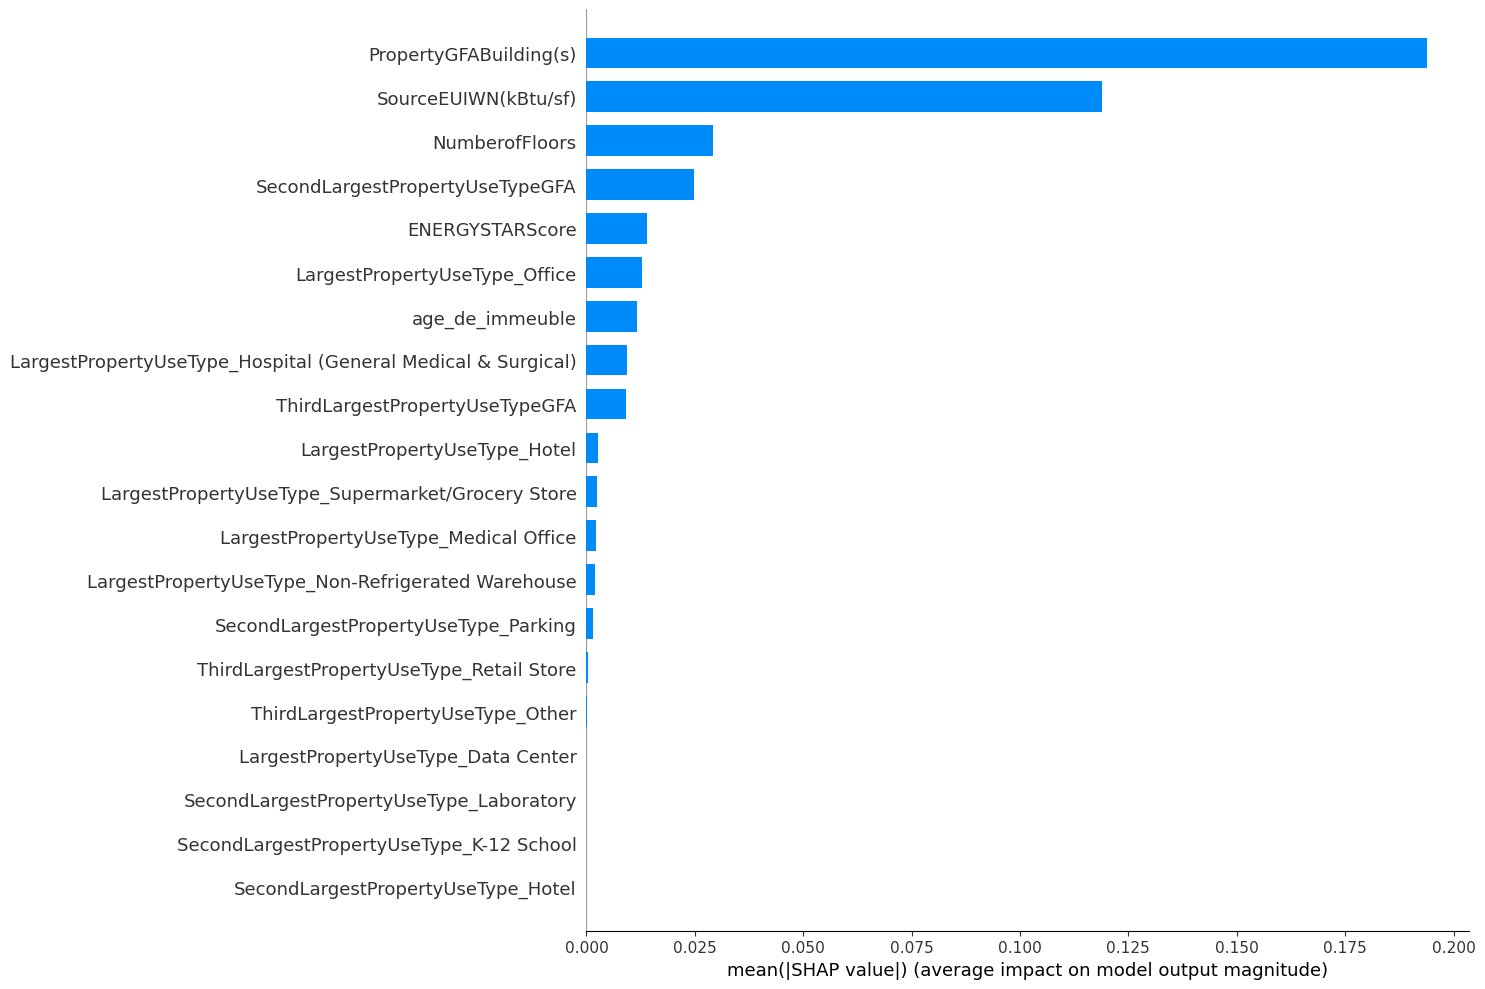

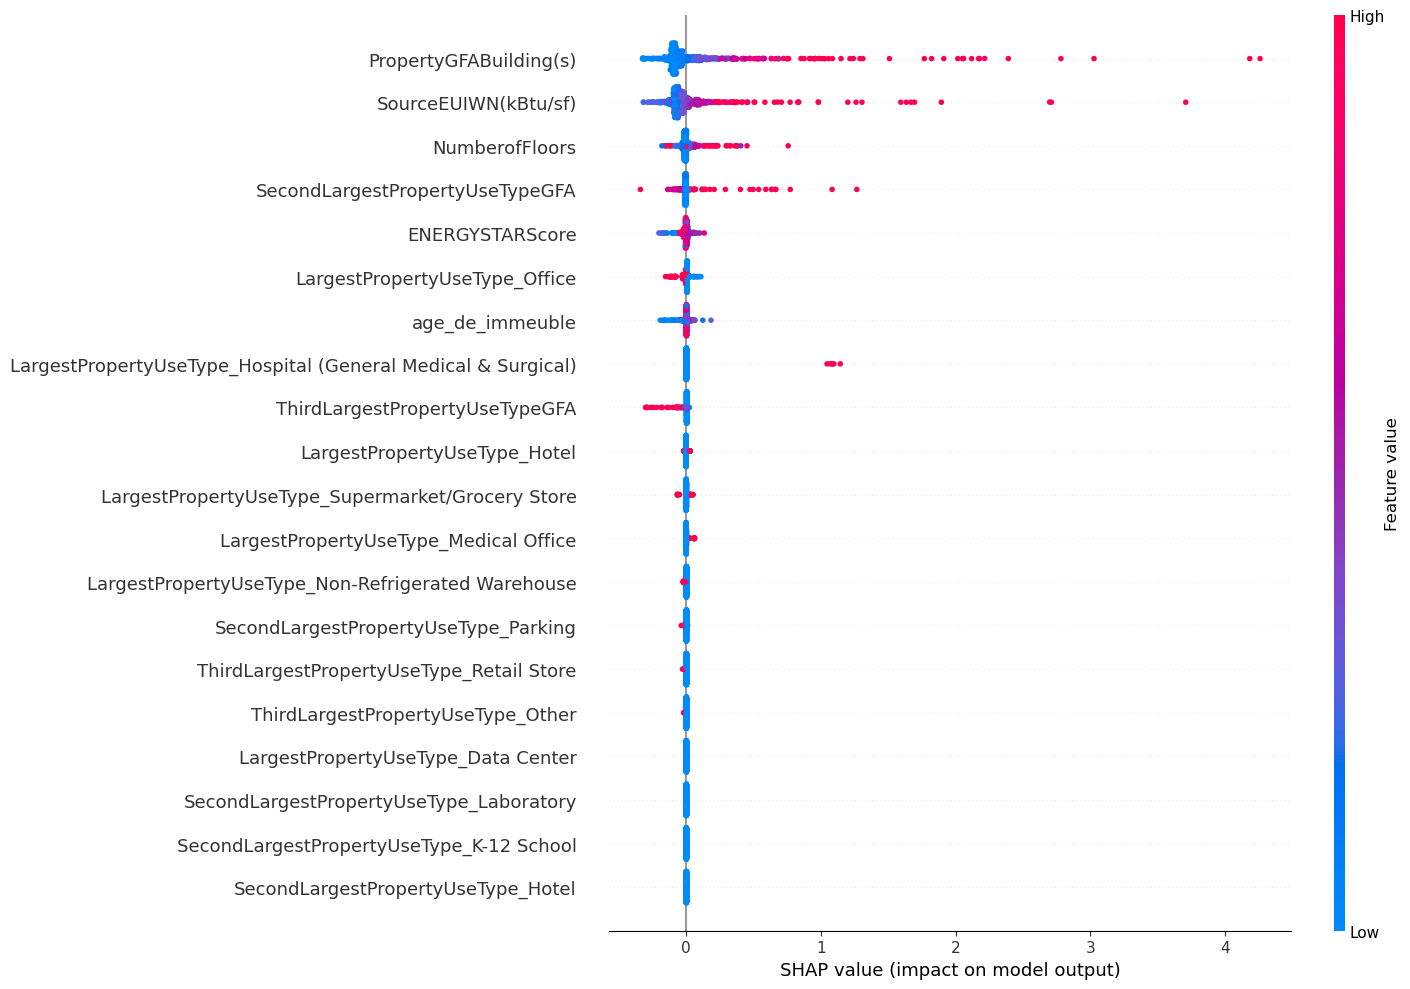

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBRegressor
import shap

# --- 2. Analyse de l'importance des caractéristiques pour "SiteEnergyUseWN(kBtu)" avec XGBoost ---

# Meilleurs hyperparamètres pour XGBoost
xgb_best_params = {
    'subsample': 0.6,
    'reg_lambda': 10,
    'reg_alpha': 0.1,
    'n_estimators': 300,
    'min_child_weight': 5,
    'max_depth': 5,
    'learning_rate': 0.2,
    'gamma': 0.1,
    'colsample_bytree': 0.8
}

# Entraîner le modèle XGBoost pour la cible "SiteEnergyUseWN(kBtu)"
xgb_model_site_energy = XGBRegressor(**xgb_best_params, random_state=42)
xgb_model_site_energy.fit(X_train, y_train[:, 0])  # Cible "SiteEnergyUseWN(kBtu)"

# --- Importance des caractéristiques avec XGBoost ---
xgb_importance_site_energy = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model_site_energy.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Afficher le graphique de l'importance des caractéristiques
plt.figure(figsize=(12, 15))  # Augmenter la taille du graphique
plt.barh(xgb_importance_site_energy['Feature'], xgb_importance_site_energy['Importance'], color='lightgreen')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Caractéristiques', fontsize=14)
plt.title('Importance des caractéristiques - XGBoost (SiteEnergyUseWN(kBtu))', fontsize=16)
plt.gca().invert_yaxis()  # Inverser l'axe Y pour afficher les caractéristiques importantes en haut
plt.tight_layout()  # Ajuster automatiquement l'espacement
plt.show()

# --- Analyse SHAP pour XGBoost ---
xgb_explainer_site_energy = shap.Explainer(xgb_model_site_energy, X_train)
shap_values_xgb_site_energy = xgb_explainer_site_energy(X_train)

# Graphique de résumé SHAP pour XGBoost (Résumé global avec barres)
shap.summary_plot(shap_values_xgb_site_energy, X_train, plot_type='bar', show=False)  # Désactiver l'affichage direct
plt.gcf().set_size_inches(15, 10)  # Augmenter la taille du graphique
plt.tight_layout()  # Ajuster l'espace
plt.show()

# Graphique de résumé SHAP pour XGBoost (Résumé détaillé avec nuages de points)
shap.summary_plot(shap_values_xgb_site_energy, X_train, show=False)  # Désactiver l'affichage direct
plt.gcf().set_size_inches(15, 10)  # Augmenter la taille pour éviter les coupures
plt.tight_layout()  # Ajuster automatiquement l'espace entre les éléments
plt.show()


# 7.1.2 ) Prédiction individuelle : 

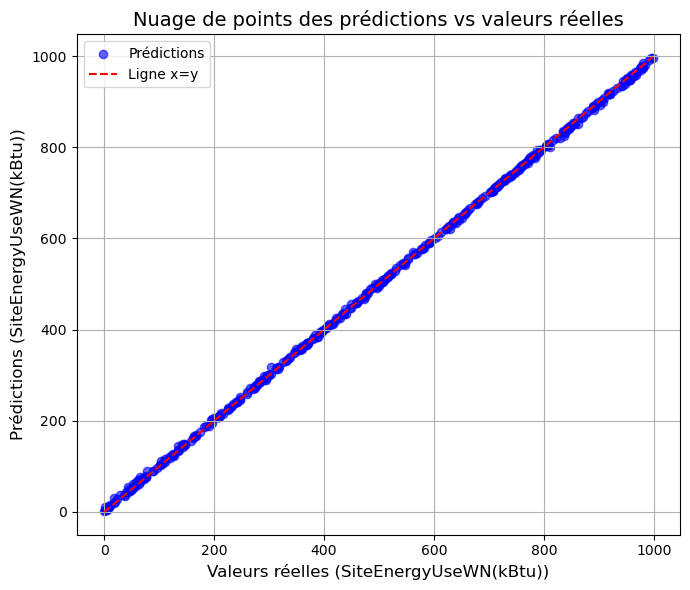

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# --- Génération de données fictives pour l'exemple ---
np.random.seed(42)
X = np.random.rand(500, 5)  # 500 échantillons, 5 features
y = np.random.rand(500, 1) * 1000  # Valeurs cibles (SiteEnergyUseWN(kBtu))

# --- Séparation des données en ensemble d'entraînement et de test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Définition et entraînement du modèle XGBoost ---
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train.ravel())  # Utilisation de .ravel() pour transformer y_train en 1D

# --- Prédictions sur l'ensemble d'entraînement ---
y_pred_site_energy = xgb_model.predict(X_train)

# --- Valeurs réelles ---
y_true_site_energy = y_train.ravel()

# --- Création du graphique ---
plt.figure(figsize=(7, 6))
plt.scatter(y_true_site_energy, y_pred_site_energy, color='blue', alpha=0.6, label="Prédictions")

# Ligne de référence x = y (prédictions parfaites)
plt.plot([min(y_true_site_energy), max(y_true_site_energy)], 
         [min(y_true_site_energy), max(y_true_site_energy)], 
         color='red', linestyle='--', label="Ligne x=y")

# Ajouter les étiquettes et le titre
plt.xlabel('Valeurs réelles (SiteEnergyUseWN(kBtu))', fontsize=12)
plt.ylabel('Prédictions (SiteEnergyUseWN(kBtu))', fontsize=12)
plt.title('Nuage de points des prédictions vs valeurs réelles', fontsize=14)
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.tight_layout()
plt.show()


# 7.2) Analyse de l'importance des variable pour la cible TotalGHGEmissions avec le mode Decision Tree:  

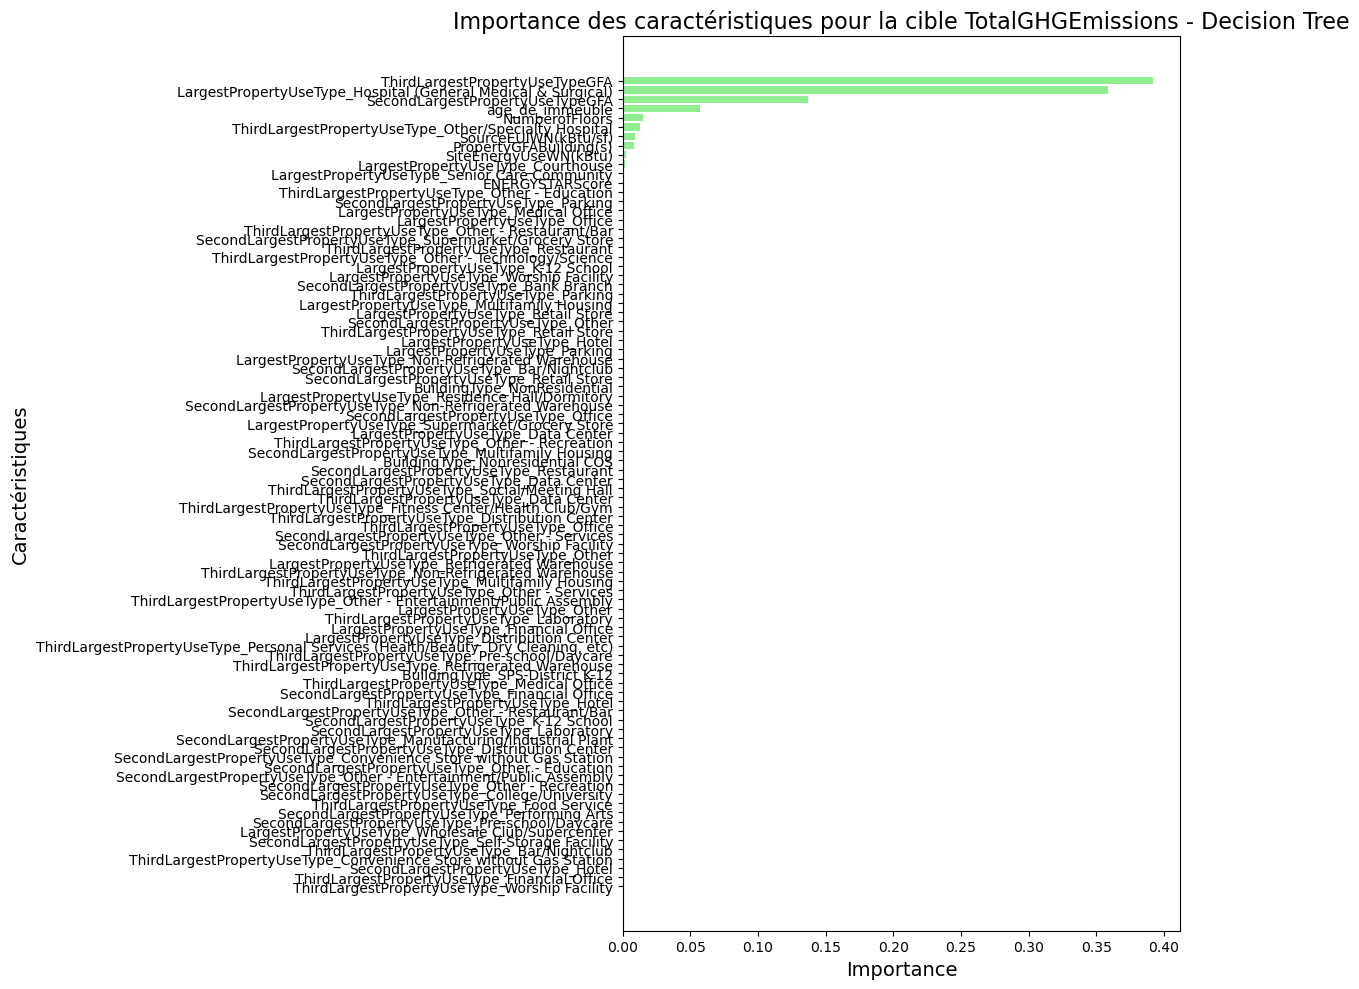

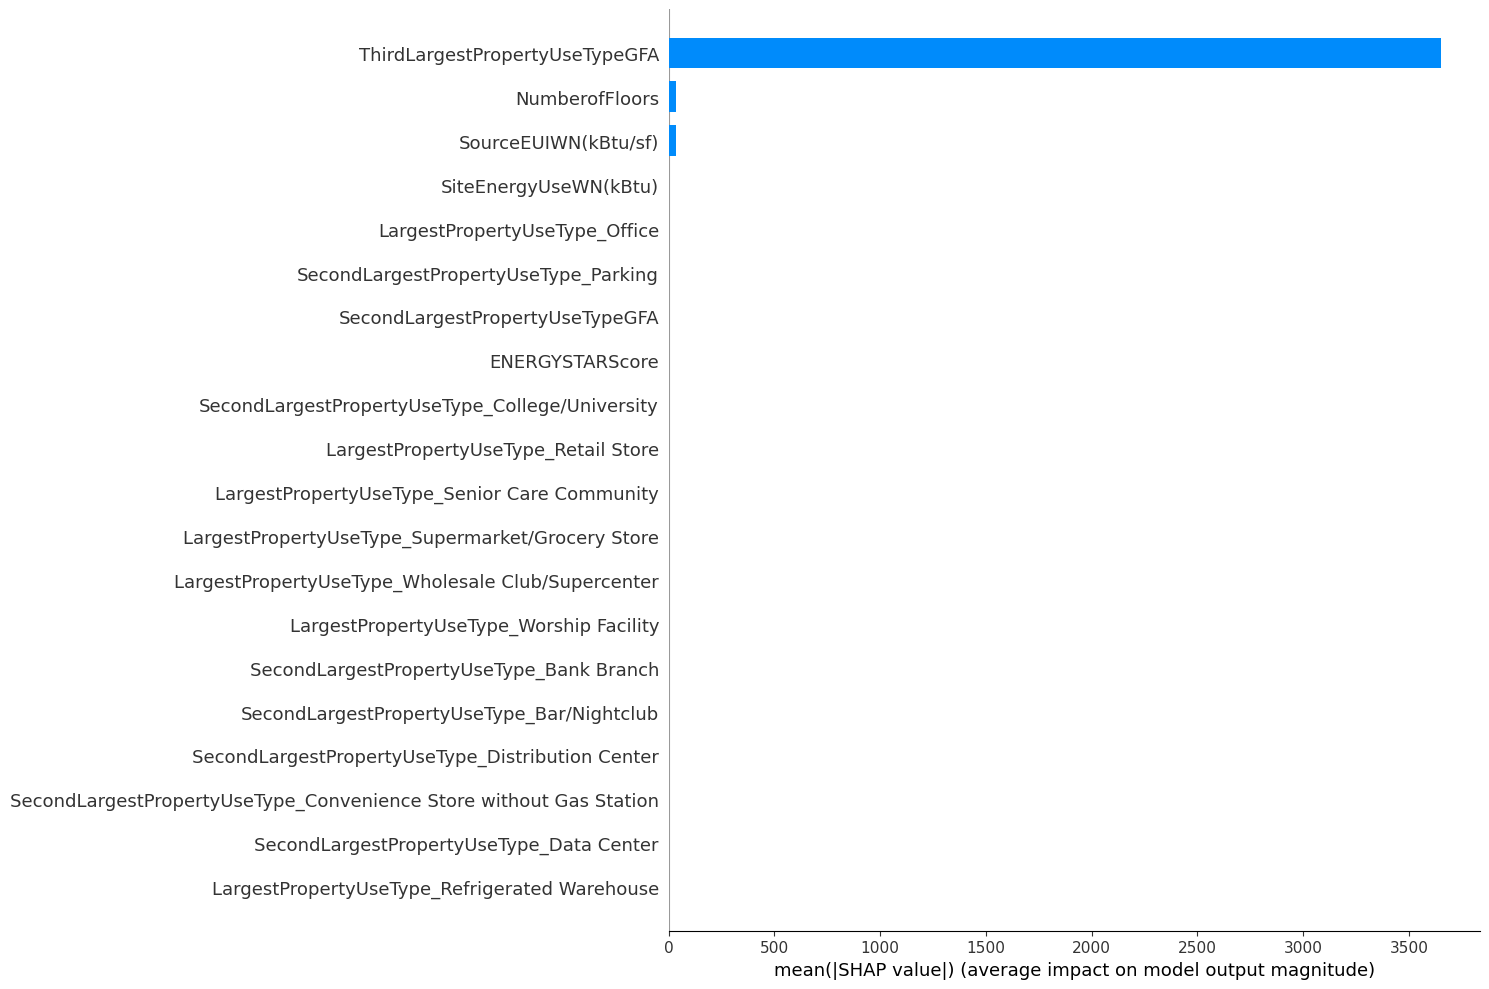

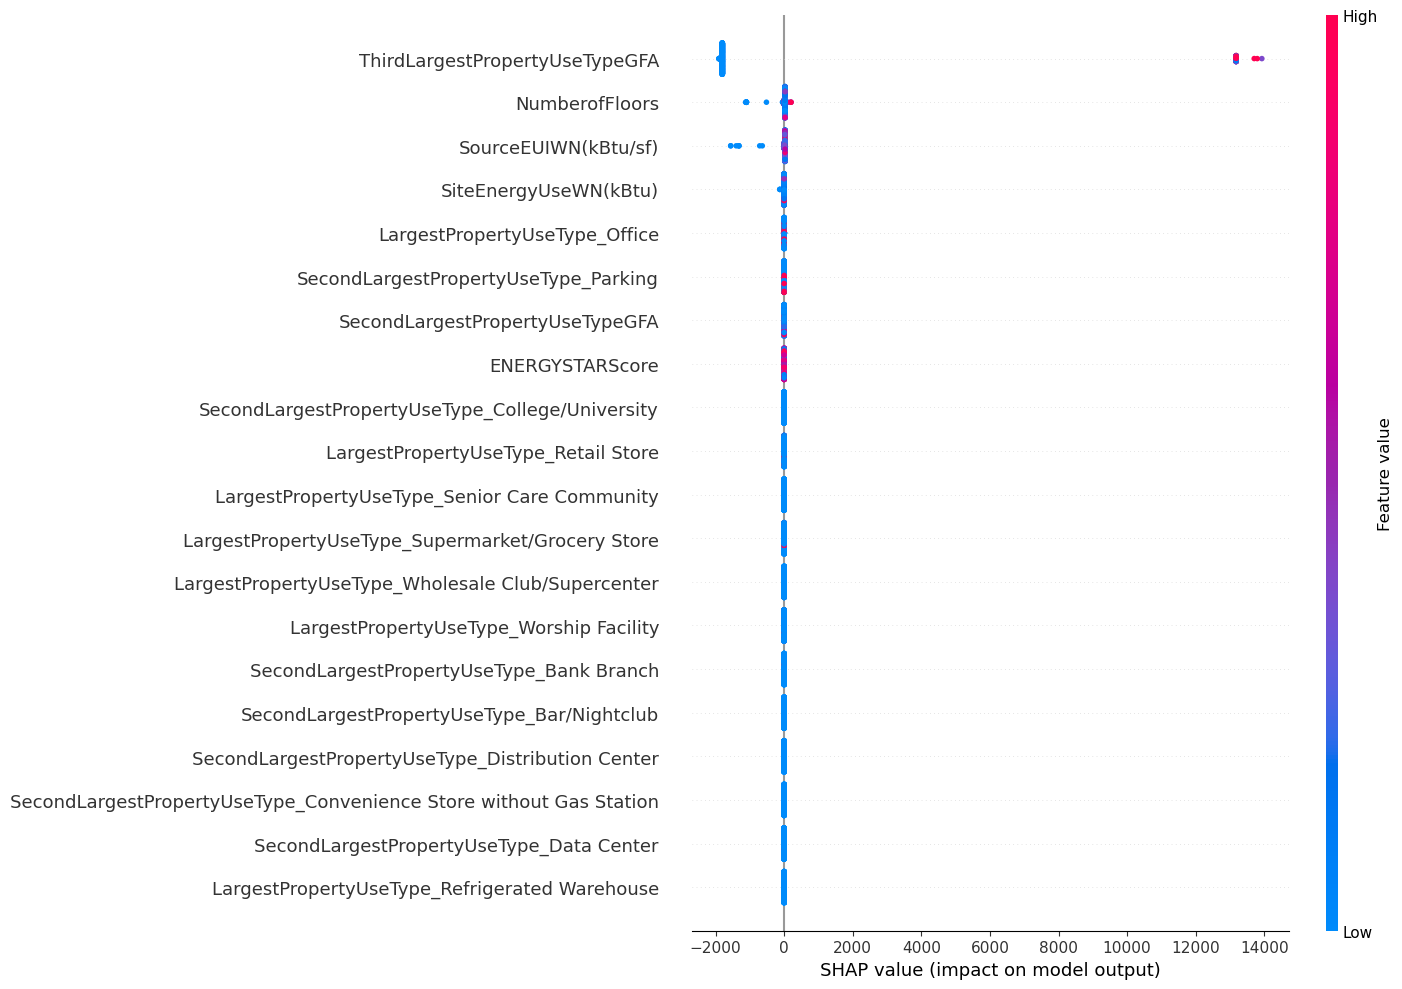

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import shap
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Séparation des caractéristiques et de la cible
X_train_ = df.drop(columns=['TotalGHGEmissions'])  # Remplacer 'TotalGHGEmissions' par le nom de la colonne cible
y_train = df[['TotalGHGEmissions']]  # La cible

# --- Meilleurs hyperparamètres pour l'arbre de décision ---
dt_best_params = {
    'max_depth': 20,
    'max_features': 'sqrt',
    'max_leaf_nodes': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2
}

# --- Créer le pipeline avec standardisation ---
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des caractéristiques (features)
    ('tree', DecisionTreeRegressor(**dt_best_params, random_state=42))  # Appliquer les meilleurs hyperparamètres
])

# Entraîner le modèle Decision Tree pour la cible 'TotalGHGEmissions'
dt_pipeline.fit(X_train_, y_train)  # Utiliser X_train_ et y_train

# Extraire le modèle final du pipeline
dt_model = dt_pipeline.named_steps['tree']

# --- Analyser l'importance des caractéristiques ---
dt_importance = pd.DataFrame({
    'Feature': X_train_.columns,  # Utiliser les colonnes de X_train_
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# --- Graphique de l'importance des caractéristiques ---
plt.figure(figsize=(12, 10))  # Taille du graphique
plt.barh(dt_importance['Feature'], dt_importance['Importance'], color='lightgreen')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Caractéristiques', fontsize=14)
plt.title('Importance des caractéristiques pour la cible TotalGHGEmissions - Decision Tree', fontsize=16)
plt.gca().invert_yaxis()  # Afficher les caractéristiques importantes en haut
plt.tight_layout()  # Éviter les chevauchements
plt.show()

# --- Analyse SHAP pour l'arbre de décision ---
# Créer un explainer SHAP
dt_explainer = shap.Explainer(dt_model, X_train_)

# Calculer les valeurs SHAP pour l'ensemble d'entraînement
shap_values = dt_explainer(X_train_)

# --- Graphique de résumé SHAP (barres) ---
shap.summary_plot(shap_values, X_train_, plot_type='bar', show=False)
plt.gcf().set_size_inches(15, 10)  # Ajuster la taille du graphique
plt.tight_layout()  # Éviter les coupures
plt.show()

# --- Graphique de résumé SHAP (nuages de points) ---
shap.summary_plot(shap_values, X_train_, show=False)
plt.gcf().set_size_inches(15, 10)  # Ajuster la taille pour les noms longs
plt.tight_layout()  # Éviter les chevauchements
plt.show()


# 7.2.1 ) predictions individuelles 

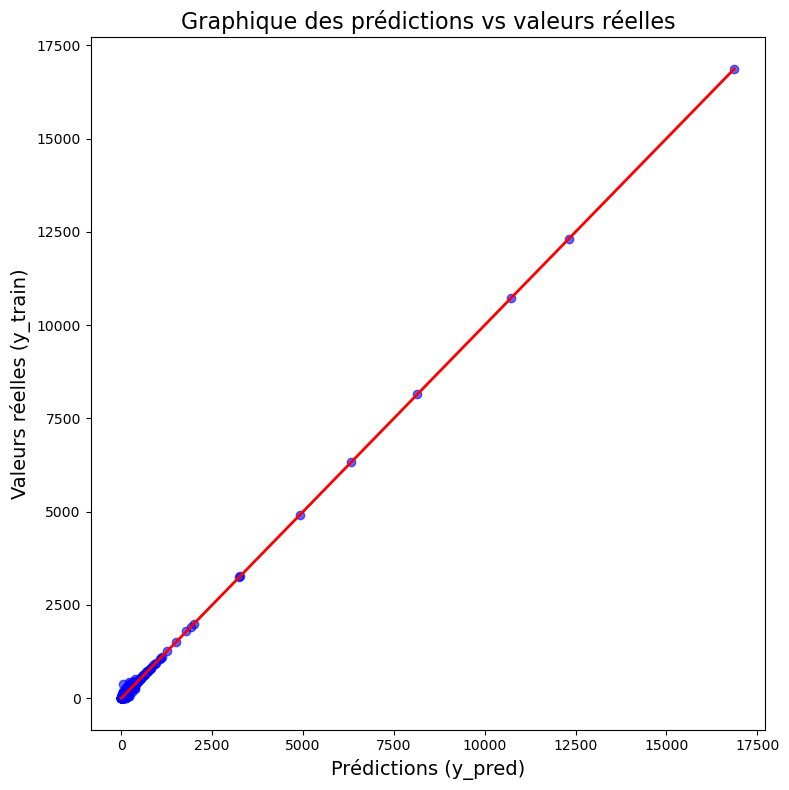

In [36]:
import matplotlib.pyplot as plt

# Faire des prédictions avec le modèle entraîné
y_pred = dt_pipeline.predict(X_train_)  # Prédictions sur l'ensemble d'entraînement

# Créer le graphique en nuage de points
plt.figure(figsize=(8, 8))  # Taille du graphique
plt.scatter(y_pred, y_train, alpha=0.6, color='blue')  # Nuage de points (prédictions vs réelles)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2)  # Ligne y=x (référence)

# Ajouter des labels et un titre
plt.xlabel('Prédictions (y_pred)', fontsize=14)
plt.ylabel('Valeurs réelles (y_train)', fontsize=14)
plt.title('Graphique des prédictions vs valeurs réelles', fontsize=16)

# Afficher le graphique
plt.tight_layout()
plt.show()
